# Árboles de Decisión - Parte I

Es un algoritmo de decisión (d'oh!) que es usado tanto para la regresión como para la clasificación, ya que nos permite predecir en qué categoría van a caer los nuevos registros que se incorporen a la base de datos.

Es decir, a diferencia de los algoritmos de regresión, los cuales predicen únicamente valores numéricos (e.g. un precio, una ganancia, una probabilidad, etc.), los árboles de decisión pueden también predecir categorías (e.g. si un email es legítimo o spam).

![Arbol](./assets/arbol_decision.png)

Un árbol de decisión podría considerarse una gran ramificación donde cada pregunta o condición divide a los datos en nuevas ramas, basándose en sus características hasta llegar a una predicción o conclusión final de esas ramas (como en el juego "Adivina quién").

In [24]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [3]:
# Cargar datos de ejemplo
df: pd.DataFrame = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


**Iris** es una base de datos de Seaborn que contiene 150 registros de flores de iris.

![Foto de Zhao Yangjun (@youngjun420) en Unsplash](https://images.unsplash.com/photo-1684154740753-00e1f0b3a7f1?q=80&w=870&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D)

In [4]:
# Verificar las especies de flores de iris que hay
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Ahora, entrenemos un modelo para que cuando encontremos una nueva flor que queramos verificar a qué especie pertenece (es decir, implica anticipar una categoría). Para ello, se deben crear conjuntos de entrenamiento y de prueba antes de entrenar al modelo.

- **Variables independientes:** largos y anchos tanto de los sépalos como de los pétalos.
- **Variable dependiente:** la especie.

In [5]:
X: pd.DataFrame = df.drop('species', axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Nótese que, como la variable independiente es categorial, debemos primero codificar sus valores en términos numéricos con los cuales el algoritmo pueda hacer cálculos.

In [15]:
# Codificar categorías como números
encoder: LabelEncoder = LabelEncoder()
y = encoder.fit_transform(df['species'])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42
)

In [21]:
# Crear el objeto del modelo
tree: DecisionTreeClassifier = DecisionTreeClassifier()

In [22]:
# Entrenar el modelo
tree.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]')

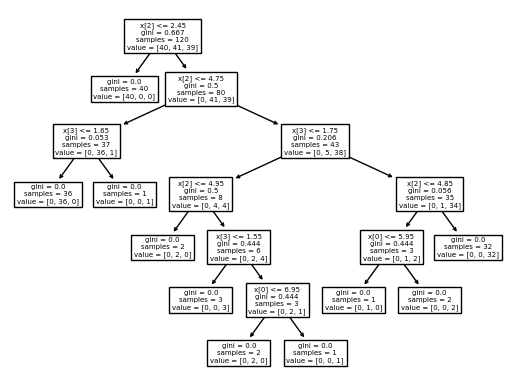

In [27]:
# Plotear el árbol
plot_tree(decision_tree=tree)